## EDA Baesd on the extracted data recorded in the info file (10% of the dataset)

In [1]:
# load the info file
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
train_info_file = "/home/bahnasy/waymo_gnn/data/Waymo/infos_train_01sweeps_filter_zero_gt.pkl"
val_info_file = "/home/bahnasy/waymo_gnn/data/Waymo/infos_val_01sweeps_filter_zero_gt.pkl"

with open(train_info_file, "rb") as f:
    train_info = pickle.load(f)
    
with open(val_info_file, "rb") as f:
    val_info = pickle.load(f)

In [2]:
train_info[0].keys()

dict_keys(['path', 'anno_path', 'token', 'timestamp', 'sweeps', 'gt_boxes', 'gt_names'])

In [3]:
train_info[0]['gt_boxes'][2]

array([-25.731575  , -12.818692  ,   0.43408477,   0.7382709 ,
         0.8311535 ,   1.82      ,  -1.3745668 ,   0.04361874,
        -4.7051787 ], dtype=float32)

In [4]:
TYPE_LIST = ['UNKNOWN', 'VEHICLE', 'PEDESTRIAN', 'SIGN', 'CYCLIST']

In [5]:

train_type_counts = {k:[0 for _ in range(len(train_info))] for k in TYPE_LIST}
train_gt_boxes = np.empty((0,9), np.float32)
c = 0
for i in tqdm(train_info):
    for label in i['gt_names']:
        train_type_counts[label][c] += 1
    train_gt_boxes = np.concatenate((train_gt_boxes, i['gt_boxes']), axis=0)
    c += 1

100%|██████████| 15809/15809 [00:37<00:00, 426.13it/s] 


In [6]:
val_type_counts = {k:[0 for _ in range(len(val_info))] for k in TYPE_LIST}
val_gt_boxes =np.empty((0,9), np.float32)
# val_gt_boxes = np.empty((0,9), np.float32)
c = 0
for i in tqdm(val_info):
    for label in i['gt_names']:
        val_type_counts[label][c] += 1
    val_gt_boxes = np.concatenate((val_gt_boxes, i['gt_boxes']), axis=0)
    c += 1 

100%|██████████| 3999/3999 [00:01<00:00, 3403.51it/s] 


In [7]:
# remove unknown class
TYPE_LIST = TYPE_LIST[1::]

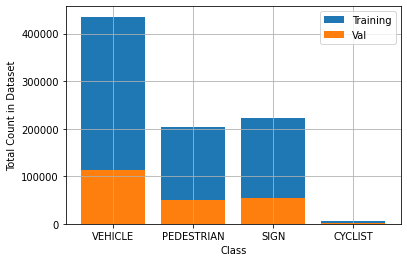

In [9]:
train_count_plot = {}
for type_ in TYPE_LIST:
    train_count_plot[type_] = sum(train_type_counts[type_])
plt.bar(train_count_plot.keys(), train_count_plot.values(), label='Training')

val_count_plot = {}
for type_ in TYPE_LIST:
    val_count_plot[type_] = sum(val_type_counts[type_])
plt.bar(val_count_plot.keys(), val_count_plot.values(), label="Val")
plt.xlabel('Class')
plt.ylabel('Total Count in Dataset')
plt.grid()
plt.legend()
plt.savefig("Total_class_counts.png")
plt.show()


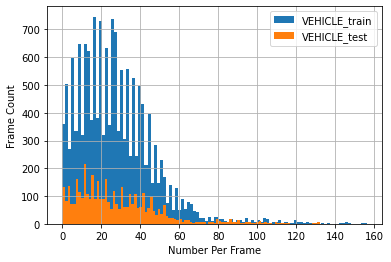

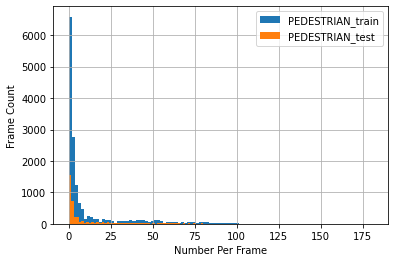

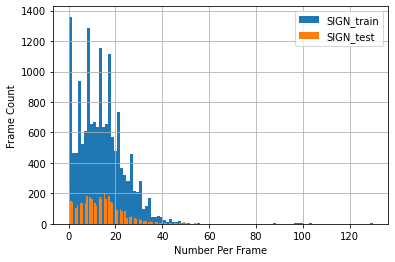

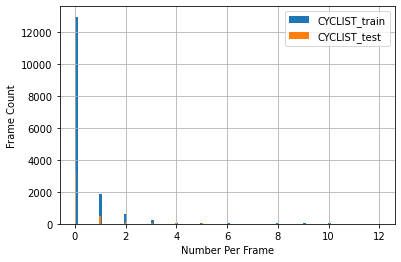

In [10]:
for type_ in TYPE_LIST:
    h = plt.hist(train_type_counts[type_], bins = 100, label="{}_train".format(type_))
    h = plt.hist(val_type_counts[type_], bins = 100, label="{}_test".format(type_))
    plt.xlabel('Number Per Frame')
    plt.ylabel('Frame Count')
    plt.grid()
    plt.legend()
    plt.savefig("number_per_frame_{}".format(type_))
    plt.show()




##### Box dimensions Statistics

In [ ]:
# x, y, z, width, length, height, rotation from negative y axis counterclockwisely 
train_gt_boxes.shape